# Applying t-SNE and PCA to 3D objects

### Taking .ply files and converting them into point clouds

In [173]:
!pip install PyntCloud
from pyntcloud import PyntCloud
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
# io
anky = PyntCloud.from_file("helix.ply")
# choose from any of the .ply files
anky.plot(mesh=False, backend="threejs")
print(anky)

anky_cloud = anky.get_sample("mesh_random", n=5000, rgb=False, normals=False, as_PyntCloud=True)
anky_cloud.plot(backend="threejs")

PyntCloud
106 points with 0 scalar fields
206 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: 0.028299205005168915, -1.1875944210260059e-06, -2.1518049240112305
Other attributes:



### Plotting point cloud again for sanity check

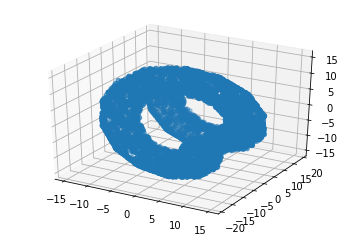

In [174]:
df = anky_cloud.points
ax = plt.axes(projection='3d')
ax.scatter3D(df['x'], df['y'], df['z'])
#ax.azim = 200
#ax.elev = -45
plt.show()

### Performing simple data rescaling

In [175]:
from sklearn.preprocessing import StandardScaler
features = ["x", "y", "z"]
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Performing PCA on the 3D point cloud

In [176]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

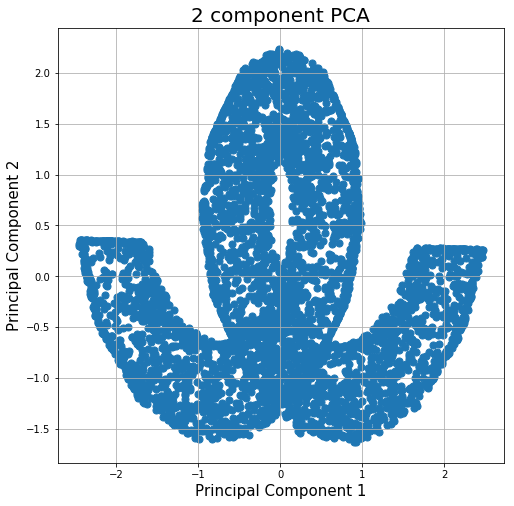

In [177]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1']
           , principalDf['principal component 2']
           , s = 50)
ax.grid()

### Performing t-SNE on the 3D point cloud

In [178]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.003s...
[t-SNE] Computed neighbors for 5000 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.456896
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.778275
[t-SNE] Error after 300 iterations: 1.521336


In [179]:
df_tsne = df.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

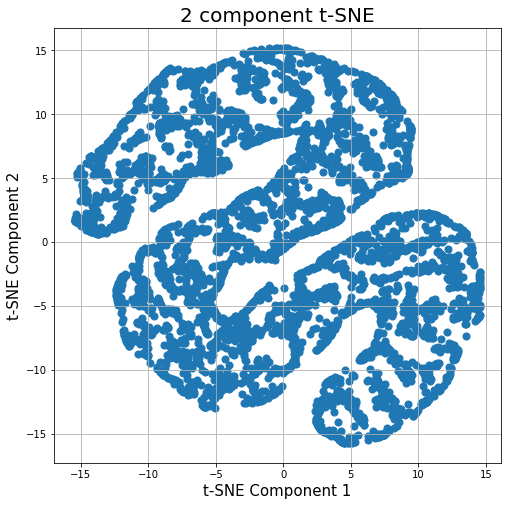

In [180]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('t-SNE Component 1', fontsize = 15)
ax.set_ylabel('t-SNE Component 2', fontsize = 15)
ax.set_title('2 component t-SNE', fontsize = 20)
ax.scatter(df_tsne['x-tsne']
           , df_tsne['y-tsne']
           , s = 50)
ax.grid()